Question 1: You are given five input features and want to predict the salary
based on the features.
x1 is the experience in data science, x2 is the experience in math, x3 is the
degree level (1 for graduate and 0 for undergraduate), x4 is the interaction
between experience in data science and math, x5 is the interaction
between the experience in data science and degree. Assuming that you
are fitting a linear regression model, with a weight vector being {50, 20,
0.07, 35, 0.01, -10}, answer the following questions:
a) Write the equation of the regression model (2 points)
b) For a fixed value of data science and math experience, what can
you conclude about the salaries of graduate vs undergraduates? (5
points)
c) Since the coefficient of interaction between experience in data
science and math is small, can you say that there is very little
evidence of an interaction effect? Explain your answer. (3 points

a)y = b0*x0+b1*x1+b2*x2+b3*x3+b4*x4+b5*x5
x4 = x1*x2
x5= x1*x3
y = 50*x0+20*x1+0.07*x2+35*x3+0.01*x1*x2-10*x1*x3

b)As x1 and x2 are fixed and xo is constant,
y = c0+c1+c2+35*x3+c4-10*x1*x3
y = c+35*x3-10*x1*x3
y = c+x3*(35-10*x1)
if x< 3.5
   Graduate Salary will be more than undergrad
if  x>3.5
    Graduate Salary will be less than undergrad

c)Since the coefficient of interaction between experience in datascience and math is small, we cannot say that there is very little
evidence of an interaction effect.
It depends on value of x1 and x2

Question 2: You sampled 30 people from a population of 100. You are
investigating if the exposure to undergraduate research has an effect on
successful admissions in grad school. The control group of 15 people
didn’t receive undergraduate research experience and the other 15 people
did receive research experience. Carry out analysis to see if there is a
significant difference between the two groups (use a p-value of 0.05).
Control group (mean = 30, std_dev = 6.63); other group (mean = 26,
std_dev = 6.20). (10 points) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.datasets import load_iris
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import math
import scipy
from scipy.stats import t


In [2]:
x1_mean = 30
x2_mean = 26
std1 =6.63
std2 =6.2
sample1_size =15
sample2_size =15

In [3]:
t = (x1_mean-x2_mean)/math.sqrt(std1*std1/sample1_size+std2*std2/sample2_size)
print(t)

1.7066724759368215


In [4]:
distr = scipy.stats.t(28)
print(distr)

In [5]:
p_value = (1-distr.cdf(1.706))*2
p_value

0.09907855797341103

In [6]:
if (p_value>0.05):
    print("Don't reject Null Hypothesis")
else:
        print("Accept Null Hypothesis")

Don't reject Null Hypothesis


Question 3: Submit the class exercise (done on 10/16) along with plotting
first 10 steps of the gradient descent in the form of the corresponding
linear regression lines. (20 points) 

## data and true fit

In [7]:
np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = np.random.rand(m, 1)  # column vector
y =  1+ 2 * X + np.random.randn(m, 1)  # column vector

In [8]:
from sklearn.preprocessing import add_dummy_feature
# the above function add x0 = 1 to your instances 
X = add_dummy_feature(X)
##### one line of code here ##### 


In [9]:
### use least squares way to calculate your best parameters
X_transpose = np.transpose(X)
X_p =np.matmul(X_transpose,X)
X_i =np.linalg.inv(X_p)
X_p1 = np.matmul(X_i,X_transpose)
theta_best = np.matmul(X_p1,y)


## theta_best = your code ###


In [10]:
# print theta_best
print(theta_best)


[[1.21509616]
 [1.54022677]]


In [11]:
# make a prediction
X_new = np.array([[0],[1]])
X_new = add_dummy_feature(X_new)
X_new

array([[1., 0.],
       [1., 1.]])

In [12]:
Y_new= np.matmul(X_new,theta_best)
Y_new

array([[1.21509616],
       [2.75532293]])

In [13]:
X.shape

(100, 2)

In [14]:
y.shape

(100, 1)

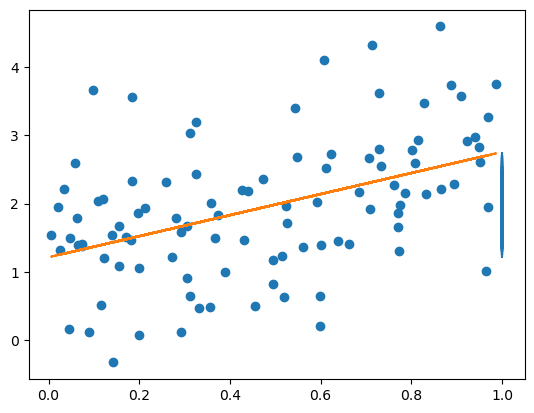

In [15]:
# plot the predictions and your data points 
Y_predict = np.matmul(X,theta_best)
#fix,ax
plt.plot(X,Y_predict)
plt.scatter(X[:,1],y)

In [16]:
from sklearn.linear_model import LinearRegression
#fit a linear regression model and print the coefficients (look at sklearn documentation)
# Split the data into training/testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 101)
# Create a linear regression object
reg_model = linear_model.LinearRegression(fit_intercept=False)
#model training
reg_model.fit(X, y)

# predictions using the trained model
y_pred = reg_model.predict(X_test)

# model evaluation
print("Mean squared error of the model is : {MSE:.2f}" .format(MSE= mean_squared_error(y_test, y_pred)))
print("Coefficient of determination (R-squared) is:{r2}".format (r2=r2_score(y_test, y_pred)))
## lin_reg = your code ### 

Mean squared error of the model is : 0.87
Coefficient of determination (R-squared) is:-0.04116731189928835


In [17]:
coefficient = reg_model.coef_
intercept =reg_model.intercept_
print(coefficient)
print(intercept)

[[1.21509616 1.54022677]]
0.0


In [18]:
# predict using linear and X_new as provided before 
y_pred = reg_model.predict(X_test)
Y_new = reg_model.predict(X_new)

print(Y_new)

[[1.21509616]
 [2.75532293]]


In [19]:
theta = np.random.randint(2)
theta

1

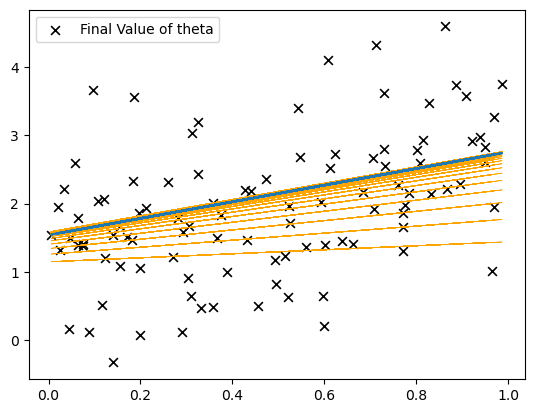

In [47]:
# gradient descent
r = 0.1  # learning rate
n_epochs = 1000
np.random.seed(100)

theta = np.array([[0],[1]])

 # randomly initialized model parameters

for epoch in range(n_epochs):
    i=0
    grad = (2/100)*(np.transpose(X)@(X@theta-y))
    theta = theta - r*grad
    Y =theta[0]*X[:,1]+theta[1]
    if (i<11):
        plt.plot(X[:,1],Y,linewidth=0.5,color ='orange')
    i=i+1
    
    # Your code here 
    
Y =theta[0]*X[:,1]+theta[1]

plt.scatter(X[:,1],y,marker='x', s=40, color='black',linewidth=1.2,label='Final Value of theta')
plt.plot
plt.legend()
plt.plot(X[:,1],Y)

In [40]:
#print theta computed from gradient descent 
print(theta)

[[1.21509614]
 [1.54022681]]
